# Portfolio
- Goals
    - Utilise different machine learnign models to train the financial data and build portfolio of stocks
- Data
    - Preprocess in path "data/~"
    - The data include five table from TEJ database, which include ~ 

## 1. Data and Import 

In [2]:
""" 
# in colab
!pip install optuna
# mount
from google.colab import drive
drive.mount('/content/drive')
# path
os.chdir('/content/drive/MyDrive/portfolio/data')
import sys
sys.path.append(sys.path[0] + f"/drive/MyDrive/portfolio") # current path + ~
# data
with open(f"{sys.path[-1]}/data/{industry}/data4model.pickle", "rb") as f:
    data = pickle.load(f)
"""

' \n# in colab\n!pip install optuna\n# mount\nfrom google.colab import drive\ndrive.mount(\'/content/drive\')\n# path\nos.chdir(\'/content/drive/MyDrive/portfolio/data\')\nimport sys\nsys.path.append(sys.path[0] + f"/drive/MyDrive/portfolio") # current path + ~\n# data\nwith open(f"{sys.path[-1]}/data/{industry}/data4model.pickle", "rb") as f:\n    data = pickle.load(f)\n'

In [1]:
%load_ext autoreload
%autoreload 2
# Preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gc, pickle, warnings

from train import summary
from utils import *
warnings.filterwarnings('ignore')

# data
industry = "automobile"
with open(f"data/{industry}/data4model.pickle", "rb") as f:
    data = pickle.load(f)

# preprocess; most preprocess are done in data file, eg. standardise, ...
data = data.reset_index()
data["ymd"] = pd.to_datetime(data["ymd"], format="%Y-%m-%d")
data = data.set_index(["code", "ymd"])

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


##  2. Train

### 2.1 Build porfolio and rolling prediciton

In [3]:

models = \
        {
        1: "linear",
        2: "elastic net",
        3: "decision tree", 
        4: "random forest", 
        5: "xgboost", 
        6: "svm",
        7: "neural network",
        8: "ensemble", 
        }

model_config = \
        {
        "industry": "automobile",
        "train_size": 5,    
        "test_size": 1,     
        "test_start": 2021,  

        "long_bound": 80,       
        "short_bound": 20,        
        "ls_decision": ["test", "no running"],
        "n_trials": 20,      
        "tune": True,
        "do_short": True, 
        "input_size": 89   
        }



In [4]:
for i in models:
    if i < 8:
        model_name = models[7]
        portfolio = summary(model_name, data, **model_config)
        portfolio.rolling_prediction()
        break

[I 2024-01-03 19:33:22,642] A new study created in memory with name: no-name-b843f3e5-9c16-4b69-a269-4603ca6b304c


param: {'batch_size': 25}
===> tune start


[I 2024-01-03 19:35:59,928] Trial 0 finished with value: -0.0002974378876388073 and parameters: {'n_layers': 8, 'active': True, 'hidden_nodes0': 369, 'hidden_nodes1': 180, 'hidden_nodes2': 273, 'hidden_nodes3': 167, 'hidden_nodes4': 72, 'hidden_nodes5': 398, 'hidden_nodes6': 73, 'hidden_nodes7': 94, 'optimizer': 'SGD', 'lr': 0.008501168146216239, 'epochs': 270, 'reg_coef': 0.00014583718596248676, 'scheduler': 'None'}. Best is trial 0 with value: -0.0002974378876388073.
[I 2024-01-03 19:36:25,088] Trial 1 finished with value: -0.0001932249724632129 and parameters: {'n_layers': 10, 'active': False, 'hidden_nodes0': 434, 'hidden_nodes1': 104, 'hidden_nodes2': 15, 'hidden_nodes3': 330, 'hidden_nodes4': 365, 'hidden_nodes5': 24, 'hidden_nodes6': 411, 'hidden_nodes7': 315, 'hidden_nodes8': 40, 'hidden_nodes9': 423, 'optimizer': 'RMSprop', 'lr': 0.00018455296196255092, 'epochs': 151, 'reg_coef': 0.0030106764160355067, 'scheduler': 'None'}. Best is trial 1 with value: -0.0001932249724632129.
[

{'n_layers': 4, 'active': False, 'hidden_nodes0': 483, 'hidden_nodes1': 380, 'hidden_nodes2': 123, 'hidden_nodes3': 74, 'optimizer': 'Adam', 'lr': 0.024758949182065303, 'epochs': 276, 'reg_coef': 1.0029353236125392e-05, 'scheduler': 'None'}
===> training start


[I 2024-01-03 20:03:14,304] A new study created in memory with name: no-name-5f8cf625-c553-449d-8fa0-bc7d05c8b8a6


2021-02-01 00:00:00
   performance        ymd
0    -0.020995 2021-01-11
param: {'batch_size': 25}
===> tune start


[I 2024-01-03 20:05:05,279] Trial 0 finished with value: -0.011309809982776642 and parameters: {'n_layers': 5, 'active': True, 'hidden_nodes0': 406, 'hidden_nodes1': 410, 'hidden_nodes2': 149, 'hidden_nodes3': 97, 'hidden_nodes4': 419, 'optimizer': 'SGD', 'lr': 0.005193413128149796, 'epochs': 200, 'reg_coef': 0.06951393782489723, 'scheduler': 'None'}. Best is trial 0 with value: -0.011309809982776642.
[I 2024-01-03 20:08:12,796] Trial 1 finished with value: -0.00020398663764353842 and parameters: {'n_layers': 7, 'active': True, 'hidden_nodes0': 179, 'hidden_nodes1': 192, 'hidden_nodes2': 187, 'hidden_nodes3': 57, 'hidden_nodes4': 197, 'hidden_nodes5': 90, 'hidden_nodes6': 210, 'optimizer': 'Adam', 'lr': 0.016356550487614998, 'epochs': 291, 'reg_coef': 0.0023338000096472214, 'scheduler': 'None'}. Best is trial 1 with value: -0.00020398663764353842.
[I 2024-01-03 20:08:38,519] Trial 2 finished with value: -0.00020727288210764527 and parameters: {'n_layers': 8, 'active': False, 'hidden_no

{'n_layers': 10, 'active': False, 'hidden_nodes0': 291, 'hidden_nodes1': 100, 'hidden_nodes2': 499, 'hidden_nodes3': 503, 'hidden_nodes4': 7, 'hidden_nodes5': 323, 'hidden_nodes6': 9, 'hidden_nodes7': 510, 'hidden_nodes8': 256, 'hidden_nodes9': 385, 'optimizer': 'Adam', 'lr': 0.000804422724014734, 'epochs': 240, 'reg_coef': 1.1404890751851058e-05, 'scheduler': 'None'}
===> training start


[I 2024-01-03 20:31:33,582] A new study created in memory with name: no-name-5b175314-0ba5-45e6-a30e-11452f935856


2021-03-01 00:00:00
   performance        ymd
0     0.023658 2021-02-09
param: {'batch_size': 25}
===> tune start


[I 2024-01-03 20:34:02,513] Trial 0 finished with value: -0.00118678854778409 and parameters: {'n_layers': 6, 'active': False, 'hidden_nodes0': 462, 'hidden_nodes1': 339, 'hidden_nodes2': 361, 'hidden_nodes3': 179, 'hidden_nodes4': 486, 'hidden_nodes5': 414, 'optimizer': 'SGD', 'lr': 1.8757526901118104e-05, 'epochs': 263, 'reg_coef': 0.011770043036135077, 'scheduler': 'None'}. Best is trial 0 with value: -0.00118678854778409.
[I 2024-01-03 20:34:05,792] Trial 1 finished with value: -0.0019774388056248426 and parameters: {'n_layers': 1, 'active': True, 'hidden_nodes0': 192, 'optimizer': 'SGD', 'lr': 1.4009584405546224e-05, 'epochs': 197, 'reg_coef': 0.08673202420071618, 'scheduler': 'None'}. Best is trial 0 with value: -0.00118678854778409.
[I 2024-01-03 20:35:48,845] Trial 2 finished with value: -1.383153501386834e+17 and parameters: {'n_layers': 6, 'active': True, 'hidden_nodes0': 394, 'hidden_nodes1': 431, 'hidden_nodes2': 492, 'hidden_nodes3': 64, 'hidden_nodes4': 197, 'hidden_nodes

{'n_layers': 5, 'active': False, 'hidden_nodes0': 267, 'hidden_nodes1': 391, 'hidden_nodes2': 425, 'hidden_nodes3': 80, 'hidden_nodes4': 506, 'optimizer': 'Adam', 'lr': 0.007982791213144188, 'epochs': 213, 'reg_coef': 0.0045337722535253155, 'scheduler': 'None'}
===> training start


[I 2024-01-03 20:49:56,207] A new study created in memory with name: no-name-c59d3157-7e92-4163-9eaa-430c15109037


2021-04-01 00:00:00
   performance        ymd
0    -0.039601 2021-03-10
param: {'batch_size': 25}
===> tune start


[I 2024-01-03 20:50:50,480] Trial 0 finished with value: -0.00021926485351286829 and parameters: {'n_layers': 3, 'active': False, 'hidden_nodes0': 124, 'hidden_nodes1': 506, 'hidden_nodes2': 451, 'optimizer': 'RMSprop', 'lr': 0.08299834631715093, 'epochs': 152, 'reg_coef': 0.00020030553237837323, 'scheduler': 'None'}. Best is trial 0 with value: -0.00021926485351286829.
[I 2024-01-03 20:50:52,714] Trial 1 finished with value: -0.001137810992076993 and parameters: {'n_layers': 10, 'active': False, 'hidden_nodes0': 340, 'hidden_nodes1': 328, 'hidden_nodes2': 345, 'hidden_nodes3': 69, 'hidden_nodes4': 129, 'hidden_nodes5': 408, 'hidden_nodes6': 415, 'hidden_nodes7': 298, 'hidden_nodes8': 239, 'hidden_nodes9': 511, 'optimizer': 'SGD', 'lr': 1.2271513906090996e-05, 'epochs': 209, 'reg_coef': 2.8823044299497693e-05, 'scheduler': 'None'}. Best is trial 0 with value: -0.00021926485351286829.
[I 2024-01-03 20:51:34,424] Trial 2 finished with value: -0.00015389375039376318 and parameters: {'n_la

{'n_layers': 1, 'active': False, 'hidden_nodes0': 6, 'optimizer': 'RMSprop', 'lr': 0.0013808487988211664, 'epochs': 163, 'reg_coef': 0.0024315959250746874, 'scheduler': 'None'}
===> training start


[I 2024-01-03 21:01:46,440] A new study created in memory with name: no-name-49ad2d41-14e4-4626-8fa0-da3dcff81c47


2021-05-01 00:00:00
   performance        ymd
0    -0.018784 2021-04-12
param: {'batch_size': 25}
===> tune start


[I 2024-01-03 21:02:34,755] Trial 0 finished with value: -0.0010842186165973544 and parameters: {'n_layers': 4, 'active': True, 'hidden_nodes0': 126, 'hidden_nodes1': 508, 'hidden_nodes2': 187, 'hidden_nodes3': 437, 'optimizer': 'RMSprop', 'lr': 0.017309978585312736, 'epochs': 299, 'reg_coef': 2.2637555028743777e-05, 'scheduler': 'None'}. Best is trial 0 with value: -0.0010842186165973544.
[I 2024-01-03 21:04:10,422] Trial 1 finished with value: -0.00036102678859606385 and parameters: {'n_layers': 4, 'active': True, 'hidden_nodes0': 126, 'hidden_nodes1': 375, 'hidden_nodes2': 293, 'hidden_nodes3': 356, 'optimizer': 'SGD', 'lr': 0.002023471410888973, 'epochs': 276, 'reg_coef': 0.0012359875509999872, 'scheduler': 'None'}. Best is trial 1 with value: -0.00036102678859606385.
[I 2024-01-03 21:04:56,762] Trial 2 finished with value: -0.00014999207633081824 and parameters: {'n_layers': 1, 'active': False, 'hidden_nodes0': 361, 'optimizer': 'Adam', 'lr': 0.048841397739988836, 'epochs': 291, '

{'n_layers': 10, 'active': False, 'hidden_nodes0': 423, 'hidden_nodes1': 453, 'hidden_nodes2': 512, 'hidden_nodes3': 63, 'hidden_nodes4': 28, 'hidden_nodes5': 389, 'hidden_nodes6': 341, 'hidden_nodes7': 283, 'hidden_nodes8': 386, 'hidden_nodes9': 5, 'optimizer': 'Adam', 'lr': 0.03678568159773476, 'epochs': 217, 'reg_coef': 0.004079198617552263, 'scheduler': 'None'}
===> training start


[I 2024-01-03 21:27:54,755] A new study created in memory with name: no-name-bed92276-2dcc-4327-8de0-a5bf405c9b1b


2021-06-01 00:00:00
   performance        ymd
0    -0.040807 2021-05-10
param: {'batch_size': 25}
===> tune start


[I 2024-01-03 21:29:15,838] Trial 0 finished with value: -0.00017578790721017867 and parameters: {'n_layers': 9, 'active': False, 'hidden_nodes0': 464, 'hidden_nodes1': 500, 'hidden_nodes2': 107, 'hidden_nodes3': 52, 'hidden_nodes4': 201, 'hidden_nodes5': 473, 'hidden_nodes6': 497, 'hidden_nodes7': 197, 'hidden_nodes8': 248, 'optimizer': 'Adam', 'lr': 0.007864084036289775, 'epochs': 156, 'reg_coef': 0.016395568848041712, 'scheduler': 'None'}. Best is trial 0 with value: -0.00017578790721017867.
[I 2024-01-03 21:30:16,334] Trial 1 finished with value: -5282055470448640.0 and parameters: {'n_layers': 4, 'active': True, 'hidden_nodes0': 248, 'hidden_nodes1': 254, 'hidden_nodes2': 356, 'hidden_nodes3': 274, 'optimizer': 'RMSprop', 'lr': 0.05704932500157192, 'epochs': 193, 'reg_coef': 0.0015244013383035424, 'scheduler': 'None'}. Best is trial 0 with value: -0.00017578790721017867.
[I 2024-01-03 21:31:02,088] Trial 2 finished with value: -0.00032275012927129865 and parameters: {'n_layers': 2

{'n_layers': 1, 'active': False, 'hidden_nodes0': 344, 'optimizer': 'Adam', 'lr': 0.0005995543885703523, 'epochs': 180, 'reg_coef': 0.09584724417514749, 'scheduler': 'None'}
===> training start


[I 2024-01-03 21:54:14,974] A new study created in memory with name: no-name-cc3a3ea7-5d27-40b7-b3c5-0b770eec32a7


2021-07-01 00:00:00
   performance        ymd
0     0.040347 2021-06-10
param: {'batch_size': 25}
===> tune start


[I 2024-01-03 21:54:47,043] Trial 0 finished with value: -0.0013519251951947808 and parameters: {'n_layers': 1, 'active': True, 'hidden_nodes0': 334, 'optimizer': 'Adam', 'lr': 0.0021433880576356866, 'epochs': 195, 'reg_coef': 0.0011843394563144061, 'scheduler': 'None'}. Best is trial 0 with value: -0.0013519251951947808.
[I 2024-01-03 21:55:02,241] Trial 1 finished with value: -0.00015824787260498852 and parameters: {'n_layers': 5, 'active': False, 'hidden_nodes0': 364, 'hidden_nodes1': 502, 'hidden_nodes2': 39, 'hidden_nodes3': 49, 'hidden_nodes4': 28, 'optimizer': 'RMSprop', 'lr': 0.0008441480345675156, 'epochs': 210, 'reg_coef': 0.0015254969199531949, 'scheduler': 'None'}. Best is trial 1 with value: -0.00015824787260498852.
[I 2024-01-03 21:58:00,301] Trial 2 finished with value: -0.0002953720395453274 and parameters: {'n_layers': 10, 'active': False, 'hidden_nodes0': 458, 'hidden_nodes1': 132, 'hidden_nodes2': 441, 'hidden_nodes3': 297, 'hidden_nodes4': 431, 'hidden_nodes5': 480,

{'n_layers': 5, 'active': False, 'hidden_nodes0': 126, 'hidden_nodes1': 242, 'hidden_nodes2': 378, 'hidden_nodes3': 504, 'hidden_nodes4': 137, 'optimizer': 'Adam', 'lr': 0.006716307561486992, 'epochs': 191, 'reg_coef': 0.007271887703355641, 'scheduler': 'None'}
===> training start


[I 2024-01-03 22:15:20,039] A new study created in memory with name: no-name-d73da63d-9fb2-4367-bb6a-757013a7c803


2021-08-01 00:00:00
   performance        ymd
0     -0.01538 2021-07-12
param: {'batch_size': 25}
===> tune start


[I 2024-01-03 22:15:34,435] Trial 0 finished with value: -0.00022625495330430567 and parameters: {'n_layers': 5, 'active': False, 'hidden_nodes0': 4, 'hidden_nodes1': 39, 'hidden_nodes2': 501, 'hidden_nodes3': 24, 'hidden_nodes4': 500, 'optimizer': 'Adam', 'lr': 7.252592424927007e-05, 'epochs': 197, 'reg_coef': 3.7207091284058374e-05, 'scheduler': 'None'}. Best is trial 0 with value: -0.00022625495330430567.
[I 2024-01-03 22:17:12,840] Trial 1 finished with value: -0.00018396391533315182 and parameters: {'n_layers': 10, 'active': False, 'hidden_nodes0': 359, 'hidden_nodes1': 158, 'hidden_nodes2': 503, 'hidden_nodes3': 12, 'hidden_nodes4': 417, 'hidden_nodes5': 16, 'hidden_nodes6': 6, 'hidden_nodes7': 94, 'hidden_nodes8': 244, 'hidden_nodes9': 506, 'optimizer': 'SGD', 'lr': 0.001141446004386149, 'epochs': 198, 'reg_coef': 0.045492253720147854, 'scheduler': 'None'}. Best is trial 1 with value: -0.00018396391533315182.
[I 2024-01-03 22:17:17,014] Trial 2 finished with value: -0.0204466897

{'n_layers': 1, 'active': False, 'hidden_nodes0': 5, 'optimizer': 'RMSprop', 'lr': 0.00017668405732205862, 'epochs': 203, 'reg_coef': 0.00013413842712717985, 'scheduler': 'None'}
===> training start


[I 2024-01-03 22:30:38,018] A new study created in memory with name: no-name-b1dea357-deee-4ef4-81fc-f742446bd015


2021-09-01 00:00:00
   performance        ymd
0     0.135735 2021-08-10
param: {'batch_size': 25}
===> tune start


[W 2024-01-03 22:31:00,581] Trial 0 failed with parameters: {'n_layers': 1, 'active': True, 'hidden_nodes0': 213, 'optimizer': 'SGD', 'lr': 0.04598653433833749, 'epochs': 191, 'reg_coef': 0.004108765589441559, 'scheduler': 'None'} because of the following error: The value nan is not acceptable..
[W 2024-01-03 22:31:00,584] Trial 0 failed with value tensor(nan).
[I 2024-01-03 22:33:26,187] Trial 1 finished with value: -0.002027261769399047 and parameters: {'n_layers': 10, 'active': True, 'hidden_nodes0': 394, 'hidden_nodes1': 287, 'hidden_nodes2': 320, 'hidden_nodes3': 243, 'hidden_nodes4': 103, 'hidden_nodes5': 41, 'hidden_nodes6': 374, 'hidden_nodes7': 110, 'hidden_nodes8': 332, 'hidden_nodes9': 276, 'optimizer': 'SGD', 'lr': 8.469574673889511e-05, 'epochs': 231, 'reg_coef': 4.030176485936519e-05, 'scheduler': 'None'}. Best is trial 1 with value: -0.002027261769399047.
[I 2024-01-03 22:34:49,194] Trial 2 finished with value: -0.00018081555026583374 and parameters: {'n_layers': 6, 'act

{'n_layers': 9, 'active': False, 'hidden_nodes0': 66, 'hidden_nodes1': 219, 'hidden_nodes2': 143, 'hidden_nodes3': 159, 'hidden_nodes4': 146, 'hidden_nodes5': 396, 'hidden_nodes6': 496, 'hidden_nodes7': 420, 'hidden_nodes8': 19, 'optimizer': 'Adam', 'lr': 0.02914376047375245, 'epochs': 273, 'reg_coef': 0.0029840846422186295, 'scheduler': 'None'}
===> training start


[I 2024-01-03 22:59:26,384] A new study created in memory with name: no-name-f76aa789-5403-4881-b11d-5700d56c4b28


2021-10-01 00:00:00
   performance        ymd
0    -0.000792 2021-09-10
param: {'batch_size': 25}
===> tune start


[I 2024-01-03 22:59:33,453] Trial 0 finished with value: -0.00019124004757031798 and parameters: {'n_layers': 3, 'active': False, 'hidden_nodes0': 398, 'hidden_nodes1': 20, 'hidden_nodes2': 432, 'optimizer': 'RMSprop', 'lr': 0.0003436222513372191, 'epochs': 160, 'reg_coef': 2.259036202908201e-05, 'scheduler': 'None'}. Best is trial 0 with value: -0.00019124004757031798.
[I 2024-01-03 23:00:16,845] Trial 1 finished with value: -0.00019968360720667988 and parameters: {'n_layers': 2, 'active': True, 'hidden_nodes0': 336, 'hidden_nodes1': 509, 'optimizer': 'Adam', 'lr': 0.010959688747669496, 'epochs': 258, 'reg_coef': 0.00015012497387111937, 'scheduler': 'None'}. Best is trial 0 with value: -0.00019124004757031798.
[I 2024-01-03 23:00:29,370] Trial 2 finished with value: -0.00044389802496880293 and parameters: {'n_layers': 5, 'active': True, 'hidden_nodes0': 132, 'hidden_nodes1': 208, 'hidden_nodes2': 295, 'hidden_nodes3': 244, 'hidden_nodes4': 241, 'optimizer': 'RMSprop', 'lr': 6.43815576

bad model


[I 2024-01-03 23:13:51,207] Trial 12 finished with value: -0.000280131702311337 and parameters: {'n_layers': 5, 'active': False, 'hidden_nodes0': 4, 'hidden_nodes1': 372, 'hidden_nodes2': 143, 'hidden_nodes3': 508, 'hidden_nodes4': 351, 'optimizer': 'Adam', 'lr': 0.08911864786897675, 'epochs': 244, 'reg_coef': 0.06896306900568983, 'scheduler': 'None'}. Best is trial 10 with value: -0.00019108440028503537.
[I 2024-01-03 23:13:57,277] Trial 13 finished with value: -0.0002075833617709577 and parameters: {'n_layers': 6, 'active': False, 'hidden_nodes0': 113, 'hidden_nodes1': 326, 'hidden_nodes2': 506, 'hidden_nodes3': 11, 'hidden_nodes4': 348, 'hidden_nodes5': 53, 'optimizer': 'Adam', 'lr': 1.1153493713150137e-05, 'epochs': 227, 'reg_coef': 0.005413178003490178, 'scheduler': 'None'}. Best is trial 10 with value: -0.00019108440028503537.
[I 2024-01-03 23:15:01,678] Trial 14 finished with value: -0.00019873891142196953 and parameters: {'n_layers': 4, 'active': True, 'hidden_nodes0': 88, 'hid

{'n_layers': 6, 'active': False, 'hidden_nodes0': 4, 'hidden_nodes1': 387, 'hidden_nodes2': 13, 'hidden_nodes3': 491, 'hidden_nodes4': 473, 'hidden_nodes5': 41, 'optimizer': 'Adam', 'lr': 0.07887422771918731, 'epochs': 242, 'reg_coef': 0.05648227645256723, 'scheduler': 'None'}
===> training start


Ensemble method

In [20]:
# Ensemble method

# add all result from models
for i in models:
    if i < 8:
        model_name = models[i]
        performance_rolling, rplsw_rolling, market_rolling  = \
            models_get_result(industry, model_name, model_config) 
    else:
        break
    if i == 1:
        rplsw_rolling_ensem = rplsw_rolling
    else:
        rplsw_rolling_ensem["pred_ls"] += rplsw_rolling["pred_ls"]


rplsw_rolling_ensem.reset_index(inplace=True)

In [43]:
# backtest returns for ensemble
def ensem_backtest(rplsw_rolling_ensem):
    rplsw_rolling_ensem = rplsw_rolling_ensem.copy()
    long = rplsw_rolling_ensem[rplsw_rolling_ensem["pred_ls"] >= 3]
    short = rplsw_rolling_ensem[rplsw_rolling_ensem["pred_ls"] <= -3]

    if len(long) != 0 and len(short) != 0:
        long_rate = .5
        short_rate = .5
    elif len(long) != 0 and len(short) == 0:
        long_rate = 1
        short_rate = 0
    elif len(long) == 0 and len(short) != 0:
        long_rate = 0
        short_rate = 1
    else:
        print("No long or short")
        return 0

    long["ensem_weight"] = (long["pred_ls"] / long["pred_ls"].sum())*long_rate
    short["ensem_weight"] = (short["pred_ls"] / short["pred_ls"].sum())*short_rate
    print(f"check weight: {long['ensem_weight'].sum() + short['ensem_weight'].sum()}")
    ensem_return = (long["ensem_weight"]*long["return"]).sum() - (short["ensem_weight"]*short["return"]).sum()
    return ensem_return

ensem_returns = {}
for date in rplsw_rolling_ensem["ymd"].unique():
    ensem_returns[date] = ensem_backtest(rplsw_rolling_ensem[rplsw_rolling_ensem["ymd"] == date])

plt.plot(np.cumprod([i + 1 for i in list(ensem_returns.values())]))
m = np.mean(list(ensem_returns.values()))*12
v = np.std(list(ensem_returns.values()))*(12**(1/2))
m, v, m/v

check weight: 1.0
check weight: 1.0
check weight: 1.0
check weight: 1.0
check weight: 1.0
check weight: 1.0
check weight: 1.0
check weight: 1.0
check weight: 1.0
check weight: 1.0
check weight: 1.0
check weight: 1.0
check weight: 1.0
check weight: 1.0
check weight: 0.9999999999999999
check weight: 1.0
check weight: 1.0
check weight: 1.0
check weight: 1.0
check weight: 1.0
check weight: 1.0
check weight: 1.0
check weight: 1.0
check weight: 1.0
check weight: 1.0
check weight: 1.0
check weight: 1.0
check weight: 1.0
check weight: 1.0
check weight: 1.0


### 2.2 Backtest
`# subplots vs subplot?`
- result in
    - result/industry/
    - result/industry/train_size_year_?

In [4]:
# Check if short success
model_name = models[7]
performance_rolling, rplsw_rolling, market_rolling  = \
    models_get_result(industry, model_name, model_config) 
(rplsw_rolling["pred_ls"] == -1).sum()

202

market performance ==================
market_mean: 0.1384795173451961, market_vol: 0.19459484931267879
market: sharpe ratio 0.7116299215231772


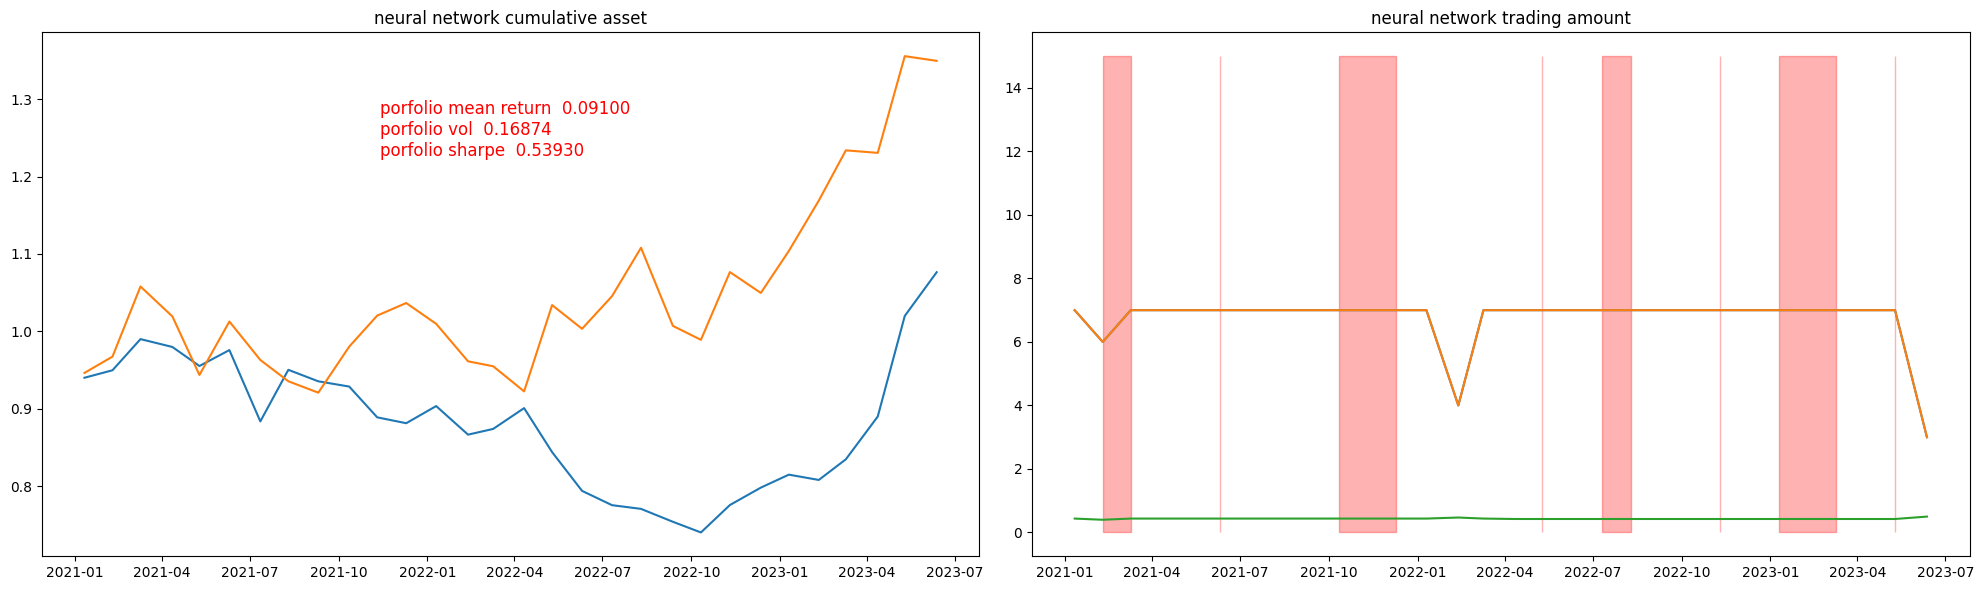

In [5]:
industry = "automobile"
models = {1: "linear",
         2: "elastic net",
         3: "decision tree", 
         4: "random forest", 
         5: "xgboost", 
         6: "svm", 
         7: "neural network",
         8: "ensemble",
         }

model_config = \
        {
        "industry": "automobile",
        "train_size": 5,    
        "test_size": 1,     
        "test_start": 2021,  

        "long_bound": 80,       
        "short_bound": 20,        
        "ls_decision": ["test", "no running"],
        "n_trials": 5,      
        "tune": True,
        "do_short": True, 
        "input_size": 89   # = input size | original dimension = input_size: 89
        }

for i in models:
    if i < 8:
        model_name = models[7]
        plot_model_result(industry, model_name, model_config)
        # performance_rolling rplsw_rolling, market_rolling, = \
        #    models_get_result(industry, model_name, model_config)        
        # n_long, n_short, trading_rate = trading(rplsw_rolling)
        break